In [3]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [4]:
import inference as inf

In [1]:
import pandas as pd
train_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_003/003_train.csv")
valid_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_003/003_valid.csv")
test_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_003/003_test.csv")

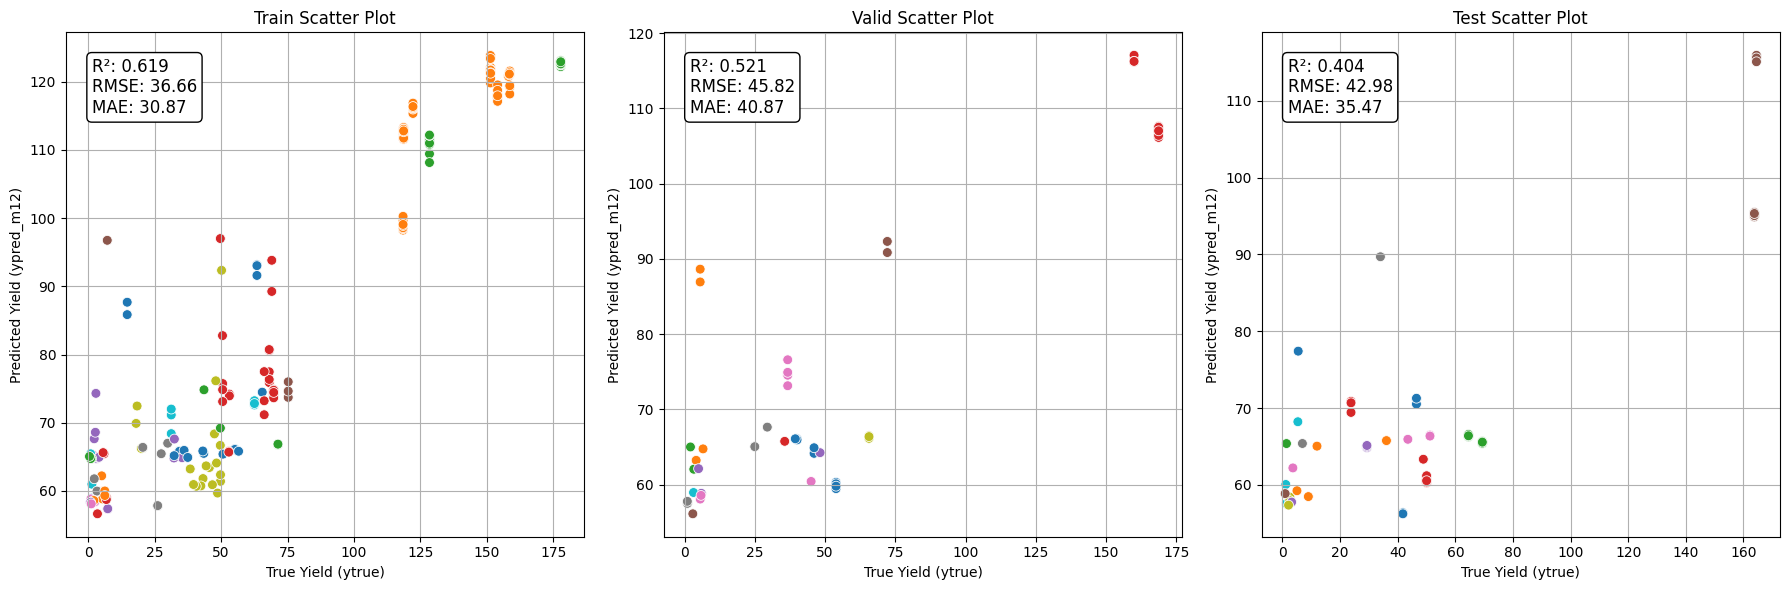

In [5]:
inf.plot_scatter_subplots(train_df, valid_df, test_df, 12)

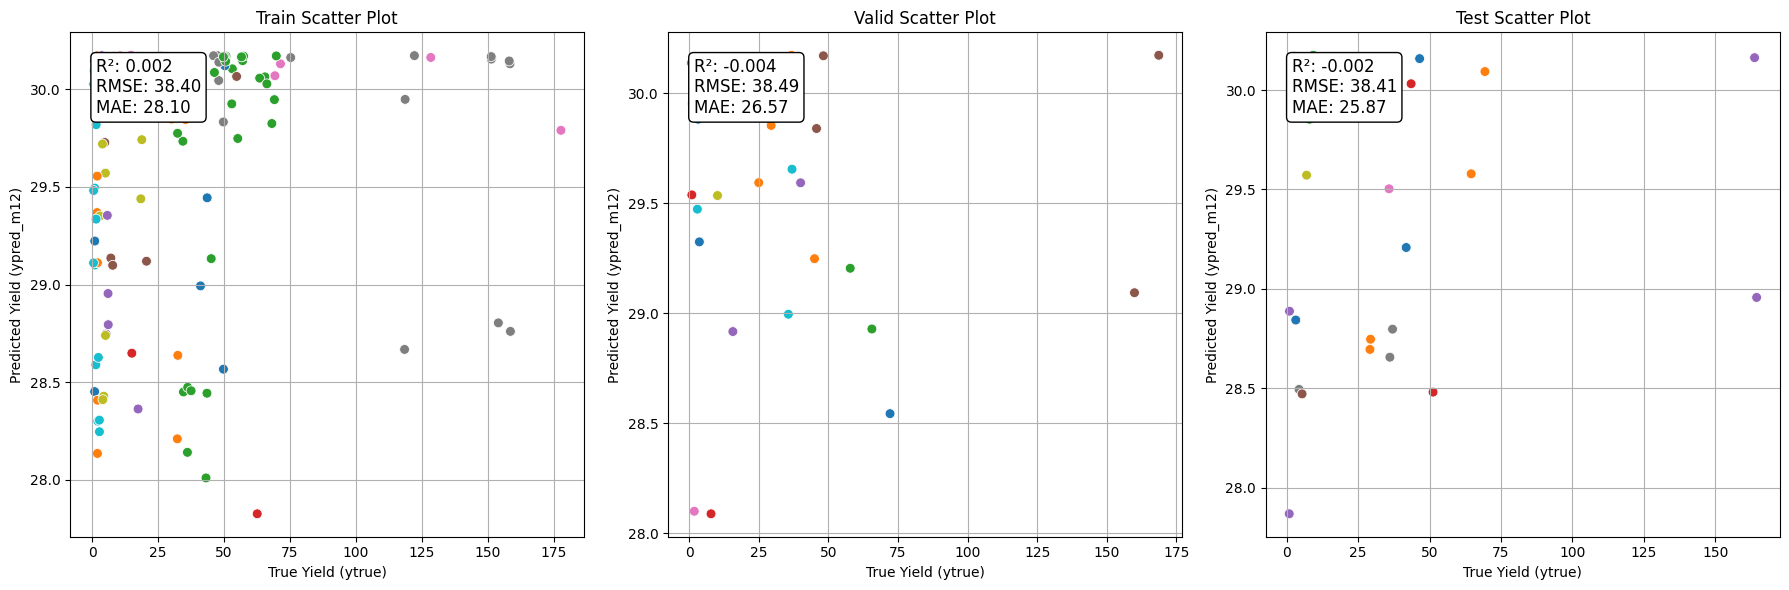

In [11]:
inf.plot_scatter_subplots(train_df, valid_df, test_df, 12)

In [12]:
import pandas as pd
train_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_test/test_train.csv")
valid_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_test/test_valid.csv")
test_df = pd.read_csv("/data2/hkaman/Projects/Foundational/EXPs/EXP_test/test_test.csv")

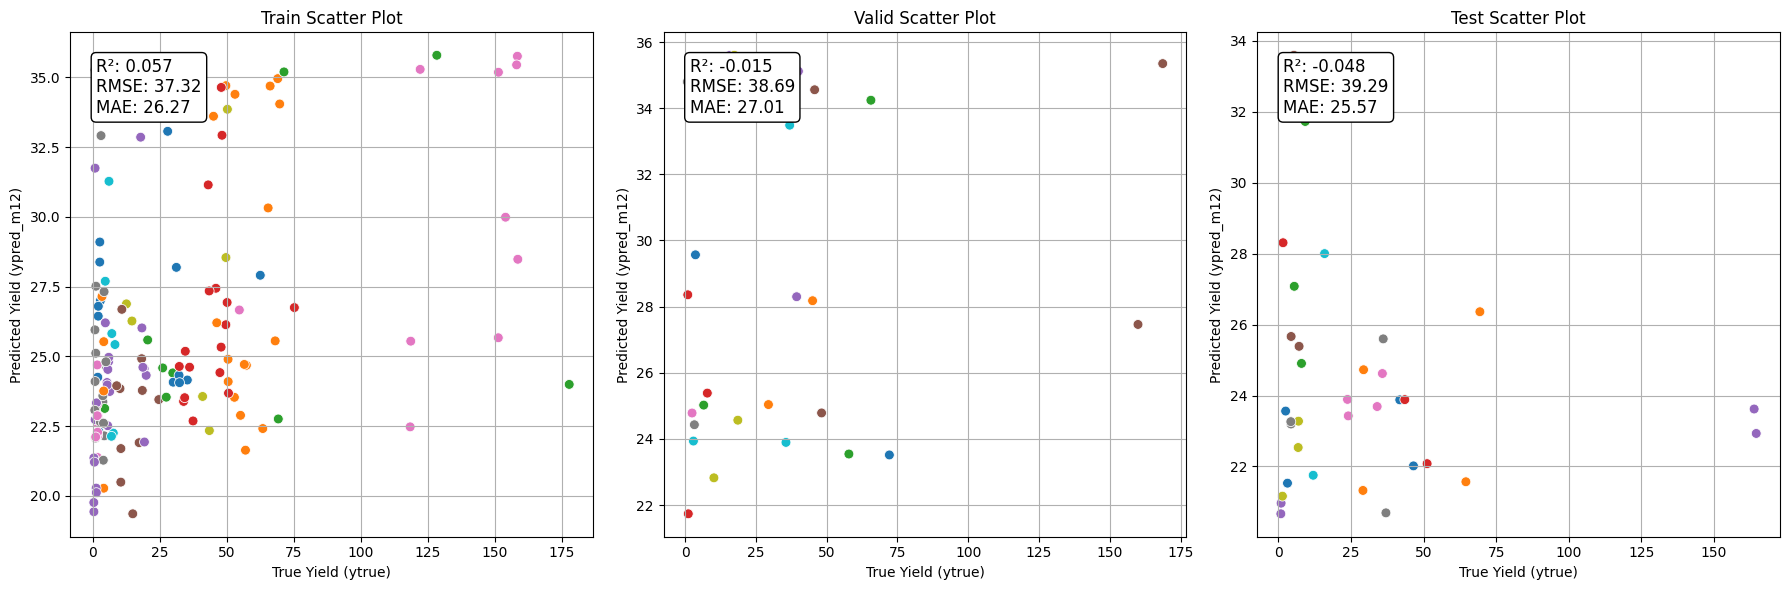

In [13]:
inf.plot_scatter_subplots(train_df, valid_df, test_df, 12)

### check the yield range values

In [8]:
import os
def read_and_split_csf_files(base_path, county_names):
    """Reads and splits CSV files for multiple counties."""
    
    train_years = list(range(2008, 2012)) + list(range(2013, 2019))  # Excludes 2012
    valid_years = [2019, 2020]
    test_years = [2021, 2022]

    train_df, valid_df, test_df = [], [], []

    for county in county_names:
        for year in range(2008, 2023):  # Loop through all expected years
            folder_path = os.path.join(base_path, county, "InD", str(year))
            csv_file = os.path.join(folder_path, f"yield_{year}.csv")  # Assuming filename matches the year

            if year == 2012 or not os.path.exists(csv_file):
                continue  # Skip missing years or non-existing files

            df = pd.read_csv(csv_file)  # Update if a different format is needed
            df = df[df['key_crop_name'] != 'No Match']

            if year in train_years:
                train_df.append(df)
            elif year in valid_years:
                valid_df.append(df)
            elif year in test_years:
                test_df.append(df)

    # Concatenate dataframes across all counties
    train_df = pd.concat(train_df, ignore_index=True) if train_df else None
    valid_df = pd.concat(valid_df, ignore_index=True) if valid_df else None
    test_df = pd.concat(test_df, ignore_index=True) if test_df else None

    df = pd.concat((train_df, valid_df, test_df), ignore_index=True) 

    return df

In [9]:
base_path = f'/data2/hkaman/Data/FoundationModel/Inputs'
county_names = ['Monterey', 'Yolo']

df = read_and_split_csf_files(base_path, county_names)
df

,key_crop_name,harvested_acres,production,yield,crop_name,county,year,price_per_unit,value
0,Alfalfa,200.0,1140.0,5.70,['HAY ALFALFA '],Monterey,2008,NaN,NaN
1,Barley,8600.0,11800.0,1.37,['BARLEY FEED '],Monterey,2008,NaN,NaN
2,Broccoli,52516.0,443100.0,31.26,"['BROCCOLI FOOD SERVICE ', 'BROCCOLI FRESH MAR...",Monterey,2008,NaN,NaN
3,Carrots,3162.0,64900.0,41.05,"['CARROTS FOOD SERVICE ', 'CARROTS FRESH MARKE...",Monterey,2008,NaN,NaN
4,Celery,10405.0,391600.0,75.27,"['CELERY FOOD SERVICE ', 'CELERY FRESH MARKET ']",Monterey,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...
389,Rice,8480.0,27000.0,3.18,"Rice, Excluding Wild",Yolo,2022,769.00,20763000.0
390,Safflower,6030.0,5670.0,0.94,Safflower,Yolo,2022,656.08,3720000.0
391,Tomatoes,35100.0,1716000.0,48.89,"Tomatoes, Processing",Yolo,2022,107.00,183612000.0
392,Walnuts,15000.0,23200.0,1.55,Walnuts,Yolo,2022,651.98,15126000.0


In [10]:
df['key_crop_name'].unique()

array(['Alfalfa', 'Barley', 'Broccoli', 'Carrots', 'Celery', 'Citrus',
       'Dry Beans', 'Durum Wheat', 'Grapes', 'Greens', 'Herbs', 'Lettuce',
       'Onions', 'Other Crops', 'Other Hay/Non Alfalfa',
       'Other Tree Crops', 'Peppers', 'Strawberries', 'Tomatoes',
       'Walnuts', 'Asparagus', 'Caneberries', 'Misc Vegs & Fruits',
       'Squash', 'Cabbage', 'Radishes', 'Almonds', 'Avocados', 'Corn',
       'Honeydew Melons', 'Plums', 'Rice', 'Safflower', 'Olives',
       'Garlic', 'Pistachios', 'Peas', 'Oats', 'Winter Wheat', 'Prunes'],
      dtype=object)

In [28]:
df[df['key_crop_name'] == 'Herbs']

,key_crop_name,harvested_acres,production,yield,crop_name,county,year,price_per_unit,value
10,Herbs,2067.0,25653.0,47.95,"['ANISE (FENNEL) ', 'CILANTRO ', 'PARSLEY ', '...",Monterey,2008,NaN,NaN
28,Herbs,1953.0,26238.0,50.19,"['ANISE (FENNEL) ', 'CILANTRO ', 'PARSLEY ', '...",Monterey,2009,NaN,NaN
62,Herbs,2550.0,26685.0,47.51,"['ANISE (FENNEL) ', 'CILANTRO ', 'PARSLEY ', '...",Monterey,2011,NaN,NaN
79,Herbs,2684.0,30046.0,48.29,"['ANISE (FENNEL)', 'CILANTRO', 'PARSLEY', 'SPI...",Monterey,2013,NaN,NaN
109,Herbs,2867.0,34982.0,49.72,"['ANISE (FENNEL)', 'CILANTRO', 'PARSLEY', 'SPI...",Monterey,2015,NaN,NaN
120,Herbs,2806.0,30428.0,46.01,"['ANISE (FENNEL)', 'CILANTRO', 'PARSLEY', 'SPI...",Monterey,2016,NaN,NaN
146,Herbs,3265.0,37340.0,48.01,"['ANISE (FENNEL) ', 'CILANTRO ', 'PARSLEY ', '...",Monterey,2018,NaN,NaN
276,Herbs,3413.0,36660.0,45.04,"['ANISE (FENNEL) ', 'CILANTRO ', 'PARSLEY ', '...",Monterey,2019,NaN,NaN
294,Herbs,1217.0,15100.0,36.71,"['ANISE (FENNEL) ', 'CILANTRO ', 'PARSLEY ']",Monterey,2020,NaN,NaN
336,Herbs,2206.0,25820.0,41.79,"['Anise/Fennel', 'Cilantro', 'Parsley']",Monterey,2021,NaN,NaN


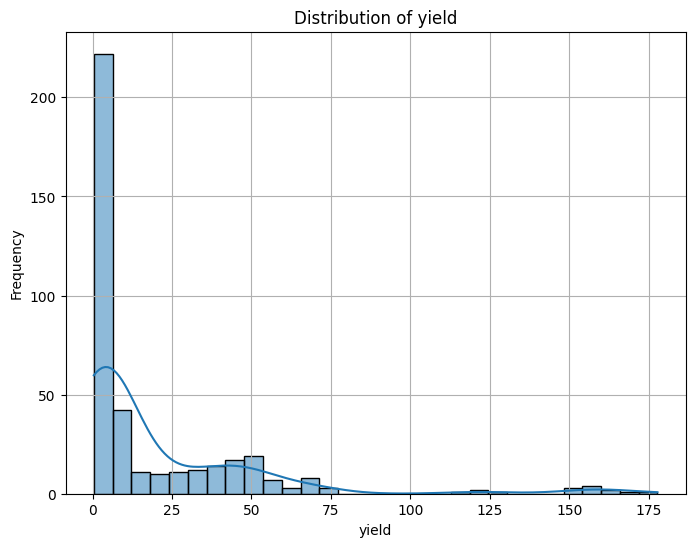

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column_name, bins=30):
    """Plots the distribution of a given column in the dataframe."""
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column_name], bins=bins, kde=True)
    
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column_name}")
    plt.grid(True)
    plt.show()

# Example usage:
plot_distribution(df, "yield")